In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
def make_stats_df(resfile):
    column_names = ["overlap","mean of props","std of props","mean of raw count","std of raw count"]
    stats_df = pd.DataFrame(columns=column_names)

    def calc_stats(stats_df,df,col,overlap):
        counts = df["{} count".format(col)].values
        props = counts/df["{} total".format(col)].values
        stats_df = stats_df.append({"overlap":overlap, "mean of props":np.mean(props),"std of props":np.std(props), "mean of raw count":np.mean(counts),"std of raw count":np.std(counts)},ignore_index=True)
        return stats_df

    df = pd.read_csv(resfile)
    for col,overlap in zip(["SN GN","CN GN","SN TN","CN TN"],["social->genetic","contact->genetic","social->transmission","contact->transmission"]):
        stats_df = calc_stats(stats_df,df,col,overlap)
    for col, overlap in zip(["SN HIV+","CN HIV+"],["social HIV+","contact HIV+"]):
        pass
        # need total number of HIV+ individuals in SN/CN (is the same)
    return stats_df


def visualize(stats_df,result_type="props"):
    stats_df.plot("overlap", "mean of {}".format(result_type), yerr="std of {}".format(result_type))
    plt.show()


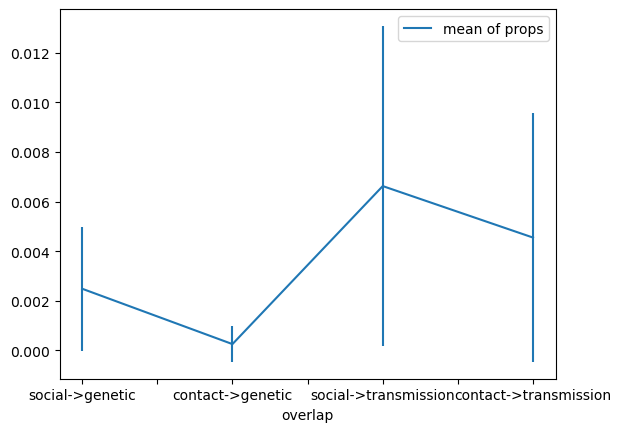

In [5]:
stats_df = make_stats_df("all_summaries_20221017.csv")
visualize(stats_df)